First we need to import the data and set up the choose the model there is going to be used
can be seen here

In [59]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import keras

hvad sker der her

In [60]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


hvad sker der her

In [61]:
batch_size = 128
num_classes = 10
epochs = 3

In [62]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

hvad sker der her

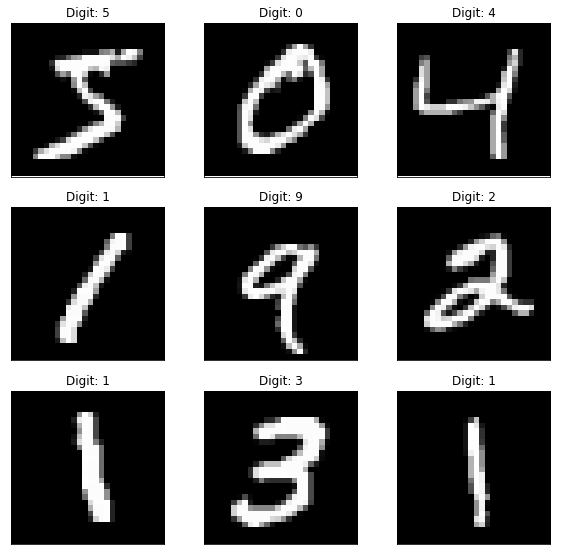

In [63]:
fig = plt.figure(figsize=(8,8))
for index in range(9):
    plt.subplot(3,3,index+1)
    plt.tight_layout()
    plt.imshow(x_train[index],cmap = 'gray')
    plt.title('Digit: {}'.format(y_train[index]))
    plt.xticks([])
    plt.yticks([])

hvad sker der her

In [64]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('x_train type:',x_train.dtype)
print('x_test type:',x_test.dtype)

print('y_train :',y_train.shape)
print('y_test shape:',x_test.shape)
print('y_train :',y_train.dtype)
print('y_test shape:',x_test.dtype)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
x_train type: uint8
x_test type: uint8
y_train : (60000,)
y_test shape: (10000, 28, 28)
y_train : uint8
y_test shape: uint8


784 fordi det er 28*28 vi siger de ikke må være mere end 255 for at få mindre loss og bedre accuracy

In [65]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

hvad sker der her

In [66]:
print('x_train reshaped:',x_train.shape)
print('x_test reshaped:',x_test.shape)
print('x_train new data type:',x_train.dtype)
print('x_test new data type:',x_test.dtype)

x_train reshaped: (60000, 784)
x_test reshaped: (10000, 784)
x_train new data type: float32
x_test new data type: float32


In [67]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [68]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


hvad sker der

In [69]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

hvad sker der her

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


hvad sker der her

In [71]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [72]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', round(score[0]*100,2),'%')
print('test accuracy:', round(score[1]*100,2),'%')

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 45s 752us/step - loss: 0.2501 - acc: 0.9239 - val_loss: 0.1127 - val_acc: 0.9655
Epoch 2/3
60000/60000 [==============================] - 41s 682us/step - loss: 0.1027 - acc: 0.9689 - val_loss: 0.0858 - val_acc: 0.9724
Epoch 3/3
60000/60000 [==============================] - 41s 685us/step - loss: 0.0719 - acc: 0.9781 - val_loss: 0.0671 - val_acc: 0.9785
test loss: 6.71 %
test accuracy: 97.85 %


conclusion